<a href="https://colab.research.google.com/github/Homabeyrami/Awesome-Decision-Science/blob/main/Abalone__h_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# نصب کتابخانه‌های مورد نیاز
!pip install pandas numpy matplotlib seaborn xgboost scikit-learn

# Import کردن کتابخانه‌های مورد نیاز
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [29]:
# دانلود فایل از Google Drive
!gdown --id 14W6R-GvwU7Tp98oMzXI3pqsrDWUqsP-s
!gdown --id 1hEk0WO4M3Z86S80df1Bj6WIVDQQBAf-h

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14W6R-GvwU7Tp98oMzXI3pqsrDWUqsP-s
To: /content/train.csv
100% 4.74M/4.74M [00:00<00:00, 147MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1hEk0WO4M3Z86S80df1Bj6WIVDQQBAf-h
To: /content/Original.csv
100% 212k/212k [00:00<00:00, 72.8MB/s]


In [ ]:
# بارگذاری داده
df = pd.read_csv('train.csv')


In [ ]:
# نمایش اطلاعات اولیه
print("نمایش اطلاعات اولیه:")
print(df.head())

نمایش اطلاعات اولیه:
   id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9  


In [ ]:
# نمایش اطلاعات آماری
print("\nنمایش اطلاعات آماری:")
print(df.describe())


نمایش اطلاعات آماری:
                 id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008      0.457671   
min        0.000000      0.075000      0.055000      0.000000      0.002000   
25%    22653.500000      0.445000      0.345000      0.110000      0.419000   
50%    45307.000000      0.545000      0.425000      0.140000      0.799500   
75%    67960.500000      0.600000      0.470000      0.160000      1.067500   
max    90614.000000      0.815000      0.650000      1.130000      2.825500   

       Whole weight.1  Whole weight.2  Shell weight         Rings  
count    90615.000000    90615.000000  90615.000000  90615.000000  
mean         0.340778        0.169422      0.225898      9.696794  
std          0.204428        0.100909      0.130203      3.176

In [ ]:
# بررسی تعداد داده‌ها و ویژگی‌ها
print("\nتعداد داده‌ها و ویژگی‌ها:")
print(df.shape)


تعداد داده‌ها و ویژگی‌ها:
(90615, 10)


In [ ]:
# بررسی مقادیر تهی
print("\nبررسی مقادیر تهی:")
print(df.isnull().sum())


بررسی مقادیر تهی:
id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


In [ ]:
# تبدیل ویژگی‌های رشته‌ای به متغیرهای عددی با استفاده از One-Hot Encoding
df_encoded = pd.get_dummies(df)

In [ ]:
# تقسیم داده به دو بخش: آموزش و آزمون
X = df_encoded.drop(columns=['Rings'])  # ویژگی‌ها
y = df_encoded['Rings']  # برچسب‌ها
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ساختن مدل Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [32]:
# آموزش مدل Random Forest با داده‌های آموزشی
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# پیش‌بینی تعداد حلقه‌ها برای داده‌های آموزش و آزمون با مدل Random Forest
predictions_rf_train = rf_model.predict(X_train)
predictions_rf_test = rf_model.predict(X_test)

In [30]:
# ارزیابی مدل Random Forest برای داده‌های آزمون
predictions_rf_test = rf_model.predict(X_test)
mse_rf_test = mean_squared_error(y_test, predictions_rf_test)
mae_rf_test = mean_absolute_error(y_test, predictions_rf_test)
medae_rf_test = median_absolute_error(y_test, predictions_rf_test)

# چاپ معیارهای ارزیابی مدل Random Forest برای داده‌های آزمون
print("\nارزیابی مدل Random Forest برای داده‌های آزمون:")
print("Mean Squared Error:", mse_rf_test)
print("Mean Absolute Error:", mae_rf_test)
print("Median Absolute Error:", medae_rf_test)



ارزیابی مدل Random Forest برای داده‌های آزمون:
Mean Squared Error: 3.613989609887988
Mean Absolute Error: 1.2912216520443633
Median Absolute Error: 0.8699999999999992


In [ ]:
# ساختن مدل XGBoost
xgb_model = xgb.XGBRegressor()


In [ ]:
# آموزش مدل XGBoost با داده‌های آموزشی
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# پیش‌بینی تعداد حلقه‌ها برای داده‌های آموزش و آزمون با مدل XGBoost
predictions_xgb_train = xgb_model.predict(X_train)
predictions_xgb_test = xgb_model.predict(X_test)

In [ ]:
# پیش‌بینی تعداد حلقه‌ها برای داده‌های آموزش و آزمون با مدل XGBoost
predictions_xgb_train = xgb_model.predict(X_train)
predictions_xgb_test = xgb_model.predict(X_test)


In [31]:
# ارزیابی مدل XGBoost برای داده‌های آزمون
predictions_xgb_test = xgb_model.predict(X_test)
mse_xgb_test = mean_squared_error(y_test, predictions_xgb_test)
mae_xgb_test = mean_absolute_error(y_test, predictions_xgb_test)
medae_xgb_test = median_absolute_error(y_test, predictions_xgb_test)

# چاپ معیارهای ارزیابی مدل XGBoost برای داده‌های آزمون
print("\nارزیابی مدل XGBoost برای داده‌های آزمون:")
print("Mean Squared Error:", mse_xgb_test)
print("Mean Absolute Error:", mae_xgb_test)
print("Median Absolute Error:", medae_xgb_test)


ارزیابی مدل XGBoost برای داده‌های آزمون:
Mean Squared Error: 3.542147915170824
Mean Absolute Error: 1.2641731022091383
Median Absolute Error: 0.8506879806518555


In [ ]:
# ترکیب مدل‌های Random Forest و XGBoost به صورت ensemble learning
# ترکیب مدل‌های Random Forest و XGBoost به صورت ensemble learning
ensemble_predictions_train = (predictions_rf_train + predictions_xgb_train) / 2


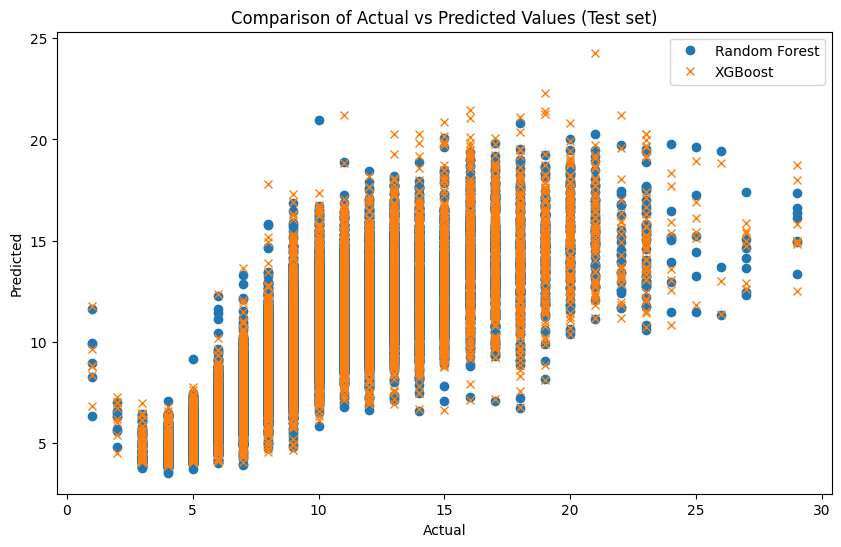

In [25]:
# رسم نمودار مقایسه خروجی‌های Random Forest و XGBoost
plt.figure(figsize=(10, 6))
plt.plot(y_test, predictions_rf_test, 'o', label='Random Forest')
plt.plot(y_test, predictions_xgb_test, 'x', label='XGBoost')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Comparison of Actual vs Predicted Values (Test set)')
plt.legend()
plt.show()


In [26]:
# چاپ معیارهای ارزیابی مدل Random Forest
print("ارزیابی مدل Random Forest:")
print("Mean Squared Error (Train):", mse_rf_train)
print("Mean Absolute Error (Train):", mae_rf_train)
print("Median Absolute Error (Train):", medae_rf_train)
print("Mean Squared Error (Test):", mse_rf_test)
print("Mean Absolute Error (Test):", mae_rf_test)
print("Median Absolute Error (Test):", medae_rf_test)

# چاپ معیارهای ارزیابی مدل XGBoost
print("\nارزیابی مدل XGBoost:")
print("Mean Squared Error (Train):", mse_xgb_train)
print("Mean Absolute Error (Train):", mae_xgb_train)
print("Median Absolute Error (Train):", medae_xgb_train)
print("Mean Squared Error (Test):", mse_xgb_test)
print("Mean Absolute Error (Test):", mae_xgb_test)
print("Median Absolute Error (Test):", medae_xgb_test)


ارزیابی مدل Random Forest:
Mean Squared Error (Train): 0.4927351583623021
Mean Absolute Error (Train): 0.4738099376482922
Median Absolute Error (Train): 0.3200000000000003
Mean Squared Error (Test): 3.613989609887988
Mean Absolute Error (Test): 1.2912216520443633
Median Absolute Error (Test): 0.8699999999999992

ارزیابی مدل XGBoost:
Mean Squared Error (Train): 2.576381640983399
Mean Absolute Error (Train): 1.1085074245123938
Median Absolute Error (Train): 0.787621259689331
Mean Squared Error (Test): 3.542147915170824
Mean Absolute Error (Test): 1.2641731022091383
Median Absolute Error (Test): 0.8506879806518555


In [33]:
# محاسبه feature importance برای مدل Random Forest
rf_feature_importance = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame(rf_feature_importance, index=X_train.columns, columns=['Importance'])
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance for Random Forest:")
print(rf_feature_importance_df)

# محاسبه feature importance برای مدل XGBoost
xgb_feature_importance = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame(xgb_feature_importance, index=X_train.columns, columns=['Importance'])
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance for XGBoost:")
print(xgb_feature_importance_df)


Feature Importance for Random Forest:
                Importance
Shell weight      0.573794
Whole weight.1    0.134342
Whole weight      0.065873
id                0.054471
Whole weight.2    0.054031
Length            0.036237
Height            0.034320
Diameter          0.031611
Sex_I             0.007401
Sex_F             0.003990
Sex_M             0.003932

Feature Importance for XGBoost:
                Importance
Shell weight      0.641426
Whole weight.1    0.099908
Sex_I             0.090279
Height            0.034546
Whole weight      0.033853
Length            0.022540
Whole weight.2    0.019874
Diameter          0.018603
Sex_M             0.014401
Sex_F             0.014241
id                0.010328
